In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.config.list_physical_devices("GPU")

[]

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## Load a dataset.

In [ ]:
datasets, info = tfds.load(
    "imdb_reviews/plain_text",
    split=["train", "test[:50%]" , "test[50%:]"],
    as_supervised=True,
    with_info=True
)
info
len(datasets)
dataset_train_original = datasets[0]
dataset_validate_original = datasets[1]
dataset_test_original = datasets[2]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.67OEDI_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.67OEDI_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.67OEDI_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


**tfds.load():**
This function is used to load datasets from TensorFlow Datasets (TFDS). In this case, it's loading the IMDb reviews dataset, specifically the "plain_text" version, which contains movie reviews and corresponding sentiment labels (positive/negative).
2. Arguments:

**2. Arguments:**
"imdb_reviews/plain_text":

Specifies the dataset to load, in this case, the IMDb reviews dataset in plain text format.
split=["train", "test[:50%]", "test[50%:]"]:

The split argument defines how to split the dataset. Here it is split into three parts:

"train": Loads the entire training dataset.

"test[:50%]": Loads the first 50% of the test dataset.

"test[50%:]": Loads the remaining 50% of the test dataset.

this effectively splits the dataset into:

Training set (all training data).

First half of the test set.

Second half of the test set.

These splits can be used for different purposes, like testing, validation, or experimentation.

**as_supervised=True:**

This argument ensures that the dataset is loaded in a supervised learning format, which means that:
The dataset will be returned as a tuple (input, label).
For the IMDb dataset, the input is the movie review (text), and the label is the sentiment (0 for negative, 1 for positive).

**with_info=True:**

This argument returns the metadata about the dataset, stored in the info variable. The metadata includes information such as:

The total number of examples in the dataset.

The dataset's splits, features, and labels.

The format of the data (e.g., text and label types).
Dataset version, citation, etc.

**3. datasets, info:**

datasets: This will store the actual loaded dataset, which is split into three parts:

datasets[0]: The training set (all training examples).

datasets[1]: The first 50% of the test set.

datasets[2]: The second 50% of the test set.

**info**: This will store metadata about the dataset (like its description, features, and split information), which is returned by TensorFlow Datasets.

In [ ]:
print("Train size:   ", len(dataset_train_original))
print("Validate size:", len(dataset_validate_original))
print("Test size:    ", len(dataset_test_original))

Train size:    25000
Validate size: 12500
Test size:     12500


## Look at your beeping data.

In [ ]:
for x, y in dataset_train_original.shuffle(25_000).take(8):
    print("x", x.numpy().decode("utf-8"))
    print("y", y.numpy())

x I discovered this movie with a retailer selling OOP's. And this one surely is an OOP. One year after The Exorcist she's back in business with this movie but what we all new was that the career of Blair never broke out, she never became a mega star. That's one of the reason's many of her films are OOP. She gives a good performance in this movie. It's about a reject not recognized by her parents and doesn't have any friends. Played at an age of 15 playing a girl of 14, that's funny. The movie is also known for the rape scene in the showers were they stick a broomstick up her virginity. In most editions it's cut out, why, I don't know, no blood is involved, okay, Blair is butt naked but nothing is shown, no T&A so nothing to offend people. But the movie is slow, extremely slow. It doesn't happy normally to me but I almost felt asleep. It's just about that 14 year old becoming a rebel against society but no blood flows, no gore no nothing. Why this is categorized in horror is still a won

Let's break it down step-by-step:
1. for x, y in dataset_train_original.shuffle(25000).take(8):
dataset_train_original: This refers to the training dataset, presumably containing IMDb movie reviews and their corresponding sentiment labels (positive or negative).

.shuffle(25000): This function shuffles the dataset randomly. The argument 25000 indicates the buffer size for shuffling. In this case, the buffer size is set to 25,000, which is the size of the entire IMDb training dataset. This ensures the dataset is shuffled randomly across all samples.

.take(8): This function specifies that only the first 8 examples are to be taken from the shuffled dataset. It limits the loop to iterate over 8 examples, instead of going through the entire dataset.

for x, y: This is a Python for-loop where:

x: Represents the input data, which in this case is the movie review (text).

y: Represents the label, which is the sentiment (either 0 for negative or 1 for positive).

2. x.numpy():
Since x is a TensorFlow tensor (specifically, a string tensor representing the movie review), the .numpy() method converts the tensor to a NumPy array. For strings, this will return a byte string (in the form of b'...').

3. .decode('utf-8'):
The .decode('utf-8') method decodes the byte string into a human-readable string using the UTF-8 encoding. This is necessary because TensorFlow stores string tensors as byte strings, and we need to convert them to regular text for printing.

4. y.numpy():
Similarly, y (the label) is also a TensorFlow tensor. The .numpy() method converts the tensor into a NumPy array or scalar, in this case, representing the sentiment label (either 0 or 1).

5. print("x", x.numpy().decode('utf-8')):
This prints the movie review (after decoding it from a tensor to a regular string).

6. print("y", y.numpy()):
This prints the sentiment label (as a numeric value, 0 or 1).

In [ ]:
type(dataset_train_original.take(8))

tensorflow.python.data.ops.take_op._TakeDataset

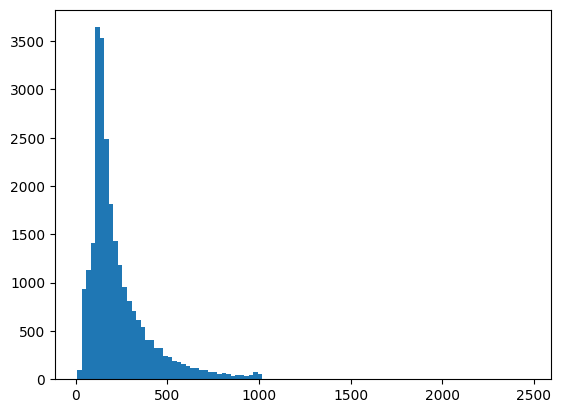

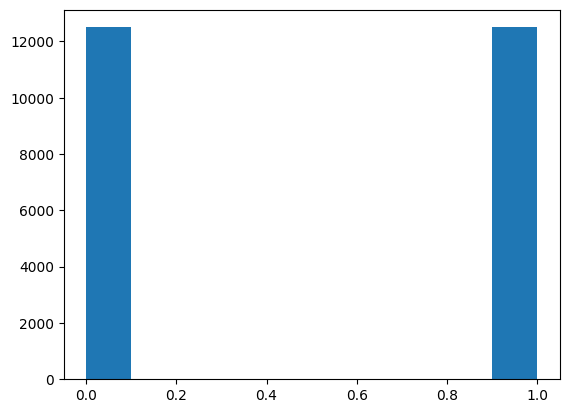

In [ ]:
lengths = []
labels = []
for x, y in dataset_train_original:
    lengths += [len(x.numpy().split())]
    labels += [y.numpy()]

plt.hist(lengths, bins=100)
plt.show()
plt.close()

plt.hist(labels)
plt.show()
plt.close()

#index_longest = np.argmax(lengths)
#longest_review = list(dataset_train_original)[index_longest]
#longest_review

In [ ]:
longest_review

NameError: name 'longest_review' is not defined

## Bag of Words Encoding (Multi-Hot)

In [ ]:
vocabulary_size = 10_000

encoder = layers.TextVectorization(
    max_tokens=vocabulary_size,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="multi_hot"
)
encoder.adapt(dataset_train_original.map(lambda text, _: text).batch(2048))

**1. vocabulary_size = 10_000:**
vocabulary_size defines the maximum number of unique words (tokens) that will be considered by the TextVectorization layer.
In this case, the vocabulary is capped at 10,000 words. Only the 10,000 most frequent words in the dataset will be used. Any additional words beyond this limit will be ignored or replaced with an out-of-vocabulary token.

**encoder = layers.TextVectorization(...):**
The TextVectorization layer is a powerful tool in TensorFlow for processing and transforming raw text data into numeric representations that can be fed into neural networks.
The encoder here refers to an instance of the TextVectorization layer, and it is configured to process and encode text data using several key parameters:

**standardize="lower_and_strip_punctuation":**

This argument specifies how to clean the input text.
"lower_and_strip_punctuation" means that:
All text will be converted to lowercase.
Punctuation will be removed from the text. For example, "Hello, World!" will become "hello world".

**Arguments to TextVectorization:**
max_tokens=vocabulary_size:

This defines the maximum number of unique tokens (words) that the layer will track. The top 10,000 most frequent words in the training data will be included in the vocabulary.

**split="whitespace"**:

This defines how the text is split into individual tokens (words).
"whitespace" means that the text will be split on spaces. So, for example, "hello world" will be split into the tokens ["hello", "world"].

**output_mode="multi_hot":**

This specifies the output representation of the text. In this case, "multi_hot" means that the output will be a multi-hot encoded vector.
A multi-hot encoding is a binary vector where:
Each index corresponds to a word in the vocabulary.
The value at each index is 1 if the corresponding word appears in the input text, and 0 if it does not.
For example, for a vocabulary of 5 words ["hello", "world", "cat", "dog", "apple"], the input "hello world" would be encoded as [1, 1, 0, 0, 0].

**encoder.adapt**(dataset_train_original.map(lambda text, _: text).batch(2048)):
encoder.adapt():

The adapt() method is used to "train" the TextVectorization layer on the dataset. It builds the vocabulary by analyzing the text data, identifying the most frequent words, and preparing the layer to tokenize future inputs based on that vocabulary.

dataset_train_original.map(lambda text, _: text):
This line maps over the dataset_train_original and extracts only the text data from each example, ignoring the labels (sentiment).

lambda text, _: text is a function that:
Takes the input (text is the review and _ is the ignored label) and returns only the text part.

.batch(2048):
The .batch(2048) method groups the text data into batches of 2048 examples, which speeds up the adapt() process.

Instead of processing each review one at a time, the layer processes batches of 2048 reviews.

In [ ]:
vocabulary = encoder.get_vocabulary()
print(vocabulary)

['[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i', 'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but', 'film', 'on', 'not', 'you', 'are', 'his', 'have', 'he', 'be', 'one', 'its', 'at', 'all', 'by', 'an', 'they', 'from', 'who', 'so', 'like', 'her', 'just', 'or', 'about', 'has', 'if', 'out', 'some', 'there', 'what', 'good', 'when', 'more', 'very', 'even', 'she', 'my', 'no', 'up', 'would', 'which', 'only', 'time', 'really', 'story', 'their', 'were', 'had', 'see', 'can', 'me', 'than', 'we', 'much', 'well', 'been', 'get', 'will', 'into', 'also', 'because', 'other', 'do', 'people', 'bad', 'great', 'first', 'how', 'most', 'him', 'dont', 'made', 'then', 'movies', 'make', 'films', 'could', 'way', 'them', 'any', 'too', 'after', 'characters', 'think', 'watch', 'two', 'many', 'being', 'seen', 'character', 'never', 'little', 'acting', 'where', 'plot', 'best', 'love', 'did', 'know', 'life', 'show', 'does', 'ever', 'your', 'still', 'better', 'over', 'off', 'these', 'end', '

In [ ]:
text = "You take a mortal man. And put him in control. Watch him become a God. Watch peoples' head aroll."
text_encoded = encoder(text)
print(list(text_encoded.numpy()))

[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## Prepare datasets

In [ ]:
dataset_train = dataset_train_original.cache().shuffle(25_000).batch(128)

dataset_validate = dataset_validate_original.cache().batch(128)

dataset_test = dataset_test_original.cache().batch(128)

In [ ]:
for x, y in dataset_train.take(1):
    print(len(x[0].numpy())) # (128)

718


## Train the model.

In [ ]:
model = models.Sequential()
model.add(encoder)
model.build(input_shape=(None,))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_vectorization                   │ (None, 10000)               │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         640,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 640,129 (2.44 MB)

 Trainable params: 640,129 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

None is often used to represent the batch size dimension, which is left unspecified at model creation time because the batch size can vary during training and inference.

In [ ]:
model.predict(tf.constant(["Exit light. Enter night. Take my hand. RUFF to never never land."]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


array([[0.5150443]], dtype=float32)

In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
print(model.evaluate(dataset_test))

98/98 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.4979 - loss: 0.6939
[0.6929723620414734, 0.5072799921035767]


In [ ]:
history = model.fit(
    dataset_train,
    epochs=4,
    validation_data=dataset_validate
)

Epoch 1/4
196/196 ━━━━━━━━━━━━━━━━━━━━ 452s 2s/step - accuracy: 0.8029 - loss: 0.4299 - val_accuracy: 0.8820 - val_loss: 0.2905
Epoch 2/4
196/196 ━━━━━━━━━━━━━━━━━━━━ 518s 3s/step - accuracy: 0.9323 - loss: 0.1874 - val_accuracy: 0.8778 - val_loss: 0.3129
Epoch 3/4
196/196 ━━━━━━━━━━━━━━━━━━━━ 466s 2s/step - accuracy: 0.9520 - loss: 0.1343 - val_accuracy: 0.8668 - val_loss: 0.3505
Epoch 4/4
196/196 ━━━━━━━━━━━━━━━━━━━━ 462s 2s/step - accuracy: 0.9662 - loss: 0.1031 - val_accuracy: 0.8602 - val_loss: 0.4139


In [ ]:
history.history

{'accuracy': [0.8604000210762024,
  0.926360011100769,
  0.9455999732017517,
  0.959119975566864],
 'loss': [0.3368341326713562,
  0.19509708881378174,
  0.1447356790304184,
  0.11436854302883148],
 'val_accuracy': [0.8820000290870667,
  0.877839982509613,
  0.8668000102043152,
  0.8601599931716919],
 'val_loss': [0.2905372679233551,
  0.3129333555698395,
  0.3505460023880005,
  0.41393163800239563]}

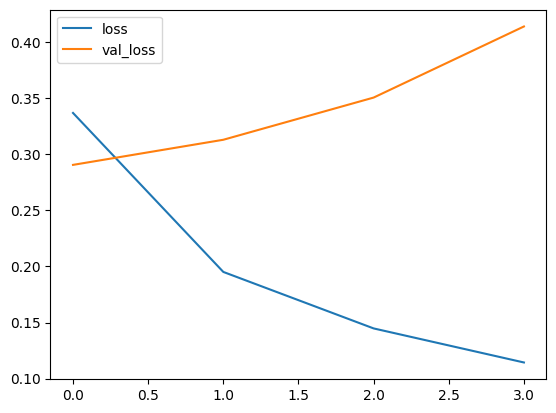

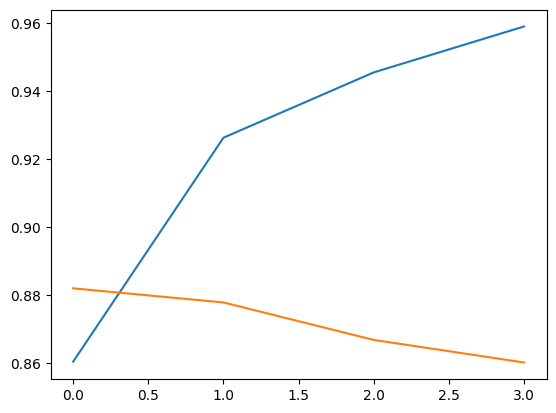

In [ ]:
def render_history(history):
  plt.plot(history.history["loss"],label ="loss")
  plt.plot(history.history["val_loss"], label ="val_loss")
  plt.legend()
  plt.show()
  plt.close()

  plt.plot(history.history["accuracy"])
  plt.plot(history.history["val_accuracy"], label ="val_accuracy")

render_history(history)

**Word Embeddings**

In [ ]:
vocabulary_size =10000
sequence_length =128

encoder = layers.TextVectorization(
    max_tokens=vocabulary_size,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="int",
    output_sequence_length=sequence_length

)

encoder.adapt(dataset_train_original.map(lambda text, _: text).batch(2048))

In [ ]:
vocabulary = encoder.get_vocabulary()
print(vocabulary)#First one is padding token"

['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i', 'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but', 'film', 'on', 'not', 'you', 'are', 'his', 'have', 'he', 'be', 'one', 'its', 'at', 'all', 'by', 'an', 'they', 'from', 'who', 'so', 'like', 'her', 'just', 'or', 'about', 'has', 'if', 'out', 'some', 'there', 'what', 'good', 'when', 'more', 'very', 'even', 'she', 'my', 'no', 'up', 'would', 'which', 'only', 'time', 'really', 'story', 'their', 'were', 'had', 'see', 'can', 'me', 'than', 'we', 'much', 'well', 'been', 'get', 'will', 'into', 'also', 'because', 'other', 'do', 'people', 'bad', 'great', 'first', 'how', 'most', 'him', 'dont', 'made', 'then', 'movies', 'make', 'films', 'could', 'way', 'them', 'any', 'too', 'after', 'characters', 'think', 'watch', 'two', 'many', 'being', 'seen', 'character', 'never', 'little', 'acting', 'where', 'plot', 'best', 'love', 'did', 'know', 'life', 'show', 'does', 'ever', 'your', 'still', 'better', 'over', 'off', 'these', 'end

**"UNK"** stands for unknown token in the vocabulary of a text processing model, especially when working with natural language processing (NLP) tasks. It is used to represent words that are not present in the model’s predefined vocabulary.

In [ ]:
text = "One morning in June some twenty years ago I was born a rich man's son."
text_encoded =encoder(text)
print(text_encoded) #word indices

tf.Tensor(
[  29 1939    8 4685   47 2115  148  598   10   14 1492    4 1004 1433
  501    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0], shape=(128,), dtype=int64)


In [ ]:
vocabulary[29]

'one'

In [ ]:
vocabulary[4685]

'june'

In [ ]:
model = models.Sequential()
model.add(encoder)#Word indices
model.build(input_shape=(None,))
model.add(layers.Embedding(input_dim=vocabulary_size,output_dim=32)) #word Embedding
model.add(layers.Flatten()) #Dimensional Reduction
model.add(layers.Dense(1,activation="sigmoid"))
model.summary()

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs=4,
    validation_data=dataset_validate
)

render_history(history)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_vectorization_2                 │ (None, 128)                 │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_10 (Embedding)             │ (None, 128, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 324,097 (1.24 MB)

 Trainable params: 324,097 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4


InvalidArgumentError: Graph execution error:

Detected at node sequential_11_1/flatten_1_1/Reshape defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-46-595da1091931>", line 15, in <cell line: 15>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 51, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 209, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 175, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 556, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py", line 54, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/numpy.py", line 4440, in reshape

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/numpy.py", line 1789, in reshape

Only one input size may be -1, not both 0 and 1
	 [[{{node sequential_11_1/flatten_1_1/Reshape}}]] [Op:__inference_one_step_on_iterator_70403]

In [ ]:
import numpy as np
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

# Assume you have a vocabulary size of 10,000 words (i.e., tokens are indexed from 0 to 9999)
vocab_size = 10000

# Embedding layer maps each word index to a vector of size 64
embedding_dim = 64

# Define a Sequential model with an Embedding layer
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=5) # input_length should match the length of your input sequences
])

# Example input: a batch of 2 sentences, each represented by a sequence of 5 word indices
input_data = [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]

# Convert input_data to a NumPy array
input_data = np.array(input_data)

# Forward pass through the Embedding layer (output shape: (batch_size, sequence_length, embedding_dim))
output = model.predict(input_data)

print("Output shape:", output.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Output shape: (2, 5, 64)


**LSTM-Long Short Term Memorry**

In [ ]:
model = models.Sequential()
model.add(encoder)
model.build(input_shape=(None,))
model.add(layers.Embedding(input_dim=vocabulary_size,output_dim=32))
model.add(layers.LSTM(64))
model.add(layers.Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_vectorization_2                 │ (None, 128)                 │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_13 (Embedding)             │ (None, 128, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 344,897 (1.32 MB)

 Trainable params: 344,897 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
196/196 ━━━━━━━━━━━━━━━━━━━━ 57s 275ms/step - accuracy: 0.6246 - loss: 0.6127 - val_accuracy: 0.8301 - val_loss: 0.4029
Epoch 2/4
196/196 ━━━━━━━━━━━━━━━━━━━━ 53s 273ms/step - accuracy: 0.8718 - loss: 0.3238 - val_accuracy: 0.8343 - val_loss: 0.3904
Epoch 3/4
196/196 ━━━━━━━━━━━━━━━━━━━━ 82s 273ms/step - accuracy: 0.8974 - loss: 0.2810 - val_accuracy: 0.8120 - val_loss: 0.4641
Epoch 4/4
196/196 ━━━━━━━━━━━━━━━━━━━━ 81s 269ms/step - accuracy: 0.8452 - loss: 0.3886 - val_accuracy: 0.8166 - val_loss: 0.4461


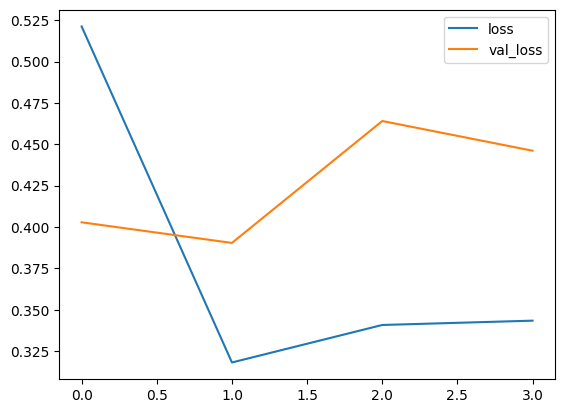

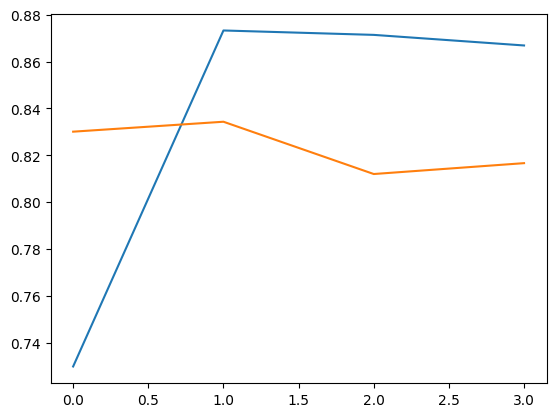

In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs=4,
    validation_data=dataset_validate
)

render_history(history)
